In [218]:
import numpy as np
import matplotlib.pyplot as pl

from scipy.optimize import linprog
%matplotlib inline

In [219]:
def nash_equilibrium(A):
    def calc(A, inv_transpose=False):
        Z = -A.T if inv_transpose else A
        coef = 1 if inv_transpose else -1
        res = linprog(coef * np.ones(Z.shape[1]), Z, -coef * np.ones(Z.shape[0]))
        return res.x
    
    Amin = min(0, np.amin(A))
    A -= Amin
    
    minmax = np.min(np.max(A, 0))
    maxmin = np.max(np.min(A, 1))
    minmax_pos = np.where(A == minmax)
    maxmin_pos = np.where(A == maxmin)
    
    if minmax == maxmin:
        p = np.zeros(A.shape[0])
        q = np.zeros(A.shape[1])
        for i in xrange(len(maxmin_pos[0])):
            for j in xrange(len(minmax_pos[0])):
                if (maxmin_pos[0][i] == minmax_pos[0][j]) and (maxmin_pos[1][i] == minmax_pos[1][j]):
                    p[maxmin_pos[0][i]] = q[maxmin_pos[1][i]] = 1
        return maxmin + Amin, p, q
    else:
        p = calc(A, inv_transpose=True)
        q = calc(A, inv_transpose=False)       
        return (1 / np.sum(p)) + Amin, p / np.sum(p), q / np.sum(q)

In [220]:
def draw_plot(strategy):
    pl.xlim([0, strategy.shape[0] + 1])
    pl.ylim([0, np.max(strategy) + 1])
    for i in xrange(strategy.shape[0]):
        pl.scatter(i + 1, strategy[i])
        pl.plot([i + 1, i + 1], [0, strategy[i]])
    pl.show()

In [221]:
def solve_and_visualise(matrix):
    v, p, q = nash_equilibrium(matrix)
    print "Значение игры =", v
    print "p =", p
    print "q =", q

    draw_plot(p)
    draw_plot(q)

Cпектр оптимальной стратегии состоит из одной точки
Значение игры = 15
p = [ 1.  0.  0.]
q = [ 0.  0.  1.  0.]


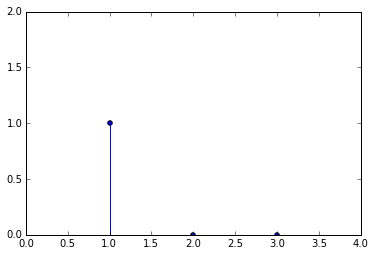

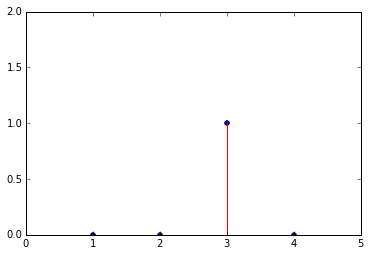

In [222]:
print "Cпектр оптимальной стратегии состоит из одной точки"
test_matrix = np.array([[18, 24, 15, 36], [24, -9, 6, 33], [21, 30, 12, 3]])
solve_and_visualise(test_matrix)

Cпектр оптимальной стратегии неполон
Значение игры = 27.0
p = [ 0.2  0.8  0. ]
q = [ 0.6  0.4  0. ]


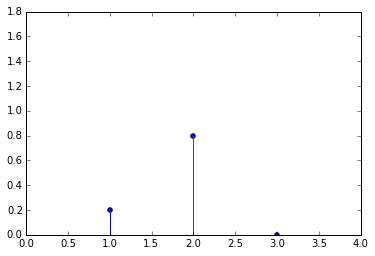

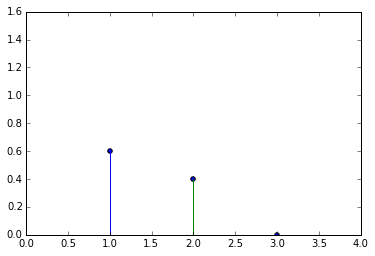

In [223]:
print "Cпектр оптимальной стратегии неполон"
test_matrix = np.array([[35, 15, 20], [25, 30, 50], [20, 5, 15]])
solve_and_visualise(test_matrix)

Cпектр оптимальной стратегии полон
Значение игры = 13.6666666667
p = [ 0.22222222  0.55555556  0.22222222]
q = [ 0.55555556  0.22222222  0.22222222]


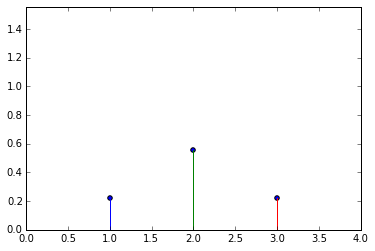

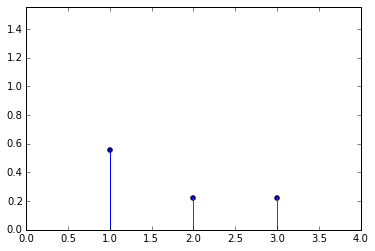

In [225]:
print "Cпектр оптимальной стратегии полон"
test_matrix = np.array([[15, 15, 9], [15, 9, 15], [9, 24, 15]])
solve_and_visualise(test_matrix)